# $Final$ $Report$ $Zillow$ $Team$ $Project$
### Group 4
  * Justin Evans
  * Yvette Ibarra


# Project Overview:
What is driving the errors in the Zestimates?

This team has been tasked to collect, clean and alayze Zillow data from 2017 in order to improve a previous prediction model that was designed to predict the Home Sale Value for Single Family Properties based on available realestate data.



# Goals: 

* Use clusters to assist in our exploration, understanding, and modeling of the Zillow data, with a target variable of logerror for this regression project.
* Discover key attributes that drive error in Zestimate logerror.
* Use those attributes to develop a machine learning model to predict impact on logerror.

# Reproduction of this Data:
* Can be accomplished using a local ```env.py``` containing ```user, password, host``` information for access to the Codeup SQL database server.
* All other step by step instructions can be found by reading the below Jupyter Notebook files located in our [Codeup-Justin-Evans-Yvette-Ibarra](https://github.com/Codeup-Justin-Evans-Yvette-Ibarra/project_zillow_team.git) github repository.
    * Final_Report_Zillow_Team_Project.ipynb
    * wrangle.py
    * explore.py
    * model.py
    * Justin_workbook.ipynb
    * Yvette_workbook_1.ipynb
    * Yvette_workbook_2.ipynb

# Imports

In [1]:
# Delete these after function build out in .py
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Increases Display Resolution for Graphs 
import matplotlib.pyplot as plt
%matplotlib inline 

# Turns off Warnings
import warnings
warnings.filterwarnings("ignore")

# Import Helper Files
import wrangle as w
import explore as e
import model as m

In [2]:
# Left Align Tables in Jupyter Notebook
# Run this code in a cell by itself
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

# Acquire:

<div class="alert alert-success">

* ```Zillow``` data from Codeup SQL database acquired on **11/17/22** was used for this project.

    
* The initial DataFrame contained 52,319 records and 68 features before cleaning & preparation.
    
    
* Each row represents a single family household record:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles', 'Orange', or 'Ventura'
    * containing longitude an latitude data
    
    
* Each column represents a feature or an informational element about the Property.

In [3]:
# Acquire zillow data 
df = w.get_zillow_data()

# Prepare:
<div class="alert alert-success">

* **Replace:** For the following features it was assumed null values meant the structure did not exist on property and those null values were imputed with 0 and used to create Binary Categorical Features:
    |FEATURE|Null/NaN COUNT|
    |:------|:------------:|
    |has_fireplace| (45,096)|
    |has_deck| (51,930)|
    |has_pool| (41,242)|
    |has_garage| (34,335)|
    |has_hottuborspa|(50,805)|
    |has_taxdelinquency|(50,251)|  
    

* **Feature Engineering:**
    |Feature|Description|
    |:------|:----------|
    |'age'  |is a feature created by subracting yearbulit from 2017|
    |optional_features|created for properties with optional features as described in the Data Dictionary.|
    |**Clusters:**|
    |loc_clusters|Using 'longitude', 'latitude', 'age' with n_clusters = 5|
    |cluster_price_size|Using 'taxamount', 'sqft', 'lot_sqft' with n_clusters = 4|
    |cluster_delinquency_value|Using ‘tax_value’, ‘sqft’, ‘has_taxdelinquency’ with n_clusters = 4|
    
    
* **'fips' Conversion:** Use fips master list to convert fips to county and state.
    
    
* **Pivot:** 
    * Pivot the resulting county column from fips conversion to 3 catagorical features. 
    * Pivot all Clusters by the number of clusters created providing individual features
    
    
* **Encoding:** The following columns were encoded with anything greater than 0 to equal 1, creating binary categorical features.
    * has_tax_delinquency
    * has_basement
    * has_fireplace
    * has_deck
    * has_garage

    
* **Rename:** Columns for Human readability.
    * 19 column feature names were changed 

    
* **Reorder:** Rearange order of columns for human readability.   

    
* **Split:** data into train, validate and test 
    * train 56%
    * validate 24%
    * test 20%
  
    
* **Scale:** Scaled several features listed below by Min/max Scaler
    * has_tax_delinquency
    * cluster_prize_size_0
    * cluster_price_size_1
    * cluster_delinquency_value_1
    * age
    * longitude
    * latitude
    * loc_cluster
    * loc_cluster_0
    * loc_cluster_1
    

<div class="alert alert-warning">
    
* <b>DROP Null/NaN COLUMNS:</b> Columns with less than 50_000 non-null values and columns with no pertenant value were dropped, totaling 34 features; <b>resulting in no record loss</b>.

    
* <b>DROP Null/NaN ROWS:</b> 474 records containing Null/NaN were dropped; <b>resulting in less than 1% record loss</b>.

    
* <b>OUTLIERS:</b> 1,552 Outlier records outliers were filtered out in an attempt to more accurately align with realistic expectations of a Single Family Residence; <b>resulting in less than a 3% decrease in overall records</b>.
    * Beds and Baths = 0 or > 8 
    * Home values > 2_000_000
    * SQFT < 400 or > 10_000  

    
* <b>IMPUTE:</b> Only zeroes were imputed for Null/NaN values and some features had values greater than zero imputed as 1 to create binary categorical features to indicate has/hasn't</div>

<div class="alert alert-info">

    
### Summary of Data Cleansing
* Cleaning the data resulted in less than 4% overall record loss, retaining 95.9% of original data

</div>

In [4]:
# Prepare Data 
df = w.zillow_prep(df)

### Split & Scale:
<div class="alert alert-success">

* **SPLIT:** train, validate and test (approx. 56/24/20)
* **Xy SPLIT:** split each DataFrame (train, validate, test) into X (selected features) and y (target) 
* **SCALED:** Min/Max Scaling was conducted on the following Features:
    * 'longitude'
    * 'latitude'
    * 'sqft'
    * 'lot_sqft'
    * 'tax_value_bldg'
    * 'tax_value'
    * 'tax_value_land'
    * 'taxamount'
    * 'age'
</div>

In [5]:
# Split Data: train, validate, and test
train, validate, test = w.split(df)
# Show Stats of Split
e.split_stats(df, train, validate, test)

Prepared df: (50293, 35)

      Train: (28163, 35) - 56.00000000000001%
   Validate: (12071, 35) - 24.0%
       Test: (10059, 35) - 20.0%


### Create Clusters:
<div class="alert alert-success">


Three seperate clusters were created consisting of at least three features each. They were added to the train, test, validate DataFrames as well as the scaled DataFrames. All resulting Cluster Features were pivoted to create binary categorical features for each cluster.
* loc_clusters
* cluster_price_size
* cluster_delinquency_value

In [6]:
# create clusters
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('loc_clusters', train,validate, test,['longitude', 'latitude','age'],5)
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_price_size', train,validate, test,['taxamount', 'sqft', 'lot_sqft'],4)
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_delinquency_value', train,validate, test,['tax_value', 'sqft', 'lot_sqft', 'has_taxdelinquency'],4)

# Data Dictionary:
<div class="alert alert-success">

    
## Continuous Categorical Counts
|Feature    |Description|
|:----------|:-----------------|
|parcelid|Unique Property Index| 
|bedrooms|Number of bedrooms in home|
|bathrooms|Number of bathrooms in home including fractional bathrooms| 
|calculatedbathnbr|Continuous float64 count of Bathrooms (including half and 3/4 baths)| 
|fullbathcnt|Count of only Full Bathrooms (no half or 3/4 baths)|
|age|The age of the home in 2017| 
|yearbuilt|The Year the principal residence was built| 

## Categorical Binary
|Feature    |Description           |
|:----------|:-----------------|
|has_basement|Basement on property (if any = 1)| 
|has_deck|Deck on property (if any = 1)| 
|has_fireplace|Fireplace on property (if any = 1)| 
|has_garage|Garage on property (if any = 1)| 
|has_hottuborspa|Hot Tub or Spa on property (if any = 1)| 
|has_pool|Pool on property (if any = 1)| 
|optional_features|Property has at least one optional feature listed above (if any = 1)| 
|has_tax_delinquency|Property has had Tax Delinquncy (if any = 1)| 

## Location
|Feature    |Description    |
|:----------|:-----------------|
|fips|Federal Information Processing Standards (FIPS), now known as Federal Information Processing Series, are numeric codes assigned by the National Institute of Standards and Technology (NIST). Typically, FIPS codes deal with US states and counties. US states are identified by a 2-digit number, while US counties are identified by a 3-digit number. For example, a FIPS code of 06111, represents California -06 and Ventura County -111.|
|state|This is the two letter abbreviation for the State as defined by the FIPS code| 
|county|FIPS code for california counties:|
      ||6037 Los Angeles County| 
      ||6059  Orange County| 
      ||6111 Ventura County|
|la_county|fips: 6037; Categorical Binary Feature for Los Angeles County (if True = 1)| 
|orange_county|fips: 6059; Categorical Binary Feature for Orange County (if True = 1)| 
|ventura_county|fips: 6111; Categorical Binary Feature for Los Angeles County (if True = 1)|
|longitude|Longitude is a measurement of location east or west of the prime meridian at Greenwich, London, England, the specially designated imaginary north-south line that passes through both geographic poles and Greenwich. Longitude is measured 180° both east and west of the prime meridian.| 
|latitude|Latitude is a measurement on a globe or map of location north or south of the Equator. Technically, there are different kinds of latitude, which are geocentric, astronomical, and geographic (or geodetic), but there are only minor differences between them.|
|zipcode|A group of five or nine numbers that are added to a postal address to assist the sorting of mail.| 
|regionidcounty|Location code that identifies the Region and County of the property within the state| 
|rawcensustractandblock|| 
|censustractandblock|Census tracts are small, relatively permanent geographic entities within counties and Block numbering areas (BNAs) are geographic entities similar to census tracts, and delineated in counties (or the statistical equivalents of counties)
without census tracts.| 

## Size
|Feature    |Description           |
|:----------|:-----------------|
|sqft|Calculated total finished living area of the home|
|lotsizesquarefeet|| 

## Value
|Feature    |Description           |
|:----------|:-----------------|
|tax_value_bldg|The total tax assessed value of the structure|
|tax_value|The total tax assessed value of the parcel| 
|tax_value_land|The total tax assessed value of the land|
|taxamount|The total tax fee to be collected on the parcel| 

## Target
|Feature    |Description           |
|:----------|:-----------------|
|log_error|This is the logerror of the Zillow Zestimate|

## Clusters
|Feature    |Description          |
|:----------|:-----------------|
|loc_clusters|Created using 'longitude', 'latitude', 'age' with n_clusters = 4|
|cluster_price_size|Created using 'taxamount', 'sqft', 'lot_sqft' with n_clusters = 4|
|cluster_delinquency_value|Created using ‘tax_value’, ‘sqft’,‘has_taxdelinquency’ with n_clusters = 4|

## Peek at the data:

In [7]:
train.head(3)

,parcelid,bedrooms,bathrooms,calculatedbathnbr,fullbathcnt,age,yearbuilt,has_basement,has_deck,has_fireplace,...,cluster_price_size,cluster_price_size_0,cluster_price_size_1,cluster_price_size_2,cluster_price_size_3,cluster_delinquency_value,cluster_delinquency_value_0,cluster_delinquency_value_1,cluster_delinquency_value_2,cluster_delinquency_value_3
11303,14498262,4.0,2.5,2.5,2.0,27.0,1990.0,0,0,0,...,0,1,0,0,0,2,0,0,1,0
26458,12851739,3.0,2.0,2.0,2.0,55.0,1962.0,0,0,0,...,3,0,0,0,1,0,1,0,0,0
28486,11276661,4.0,2.0,2.0,2.0,24.0,1993.0,0,0,0,...,3,0,0,0,1,0,1,0,0,0


# Exploration: 
<div class="alert alert-success">
    
    
* We explored the interaction between independent variables and the target variable logerror 
    
* We used Clustering, Visualization and Statistical Testing to explore the data.
    
* A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. 

<div class="alert alert-warning">


# Question 1: 
# Do Longitude and Lattitude have a relationship with eachother and our target feature of Zillow Zestimate logerror?

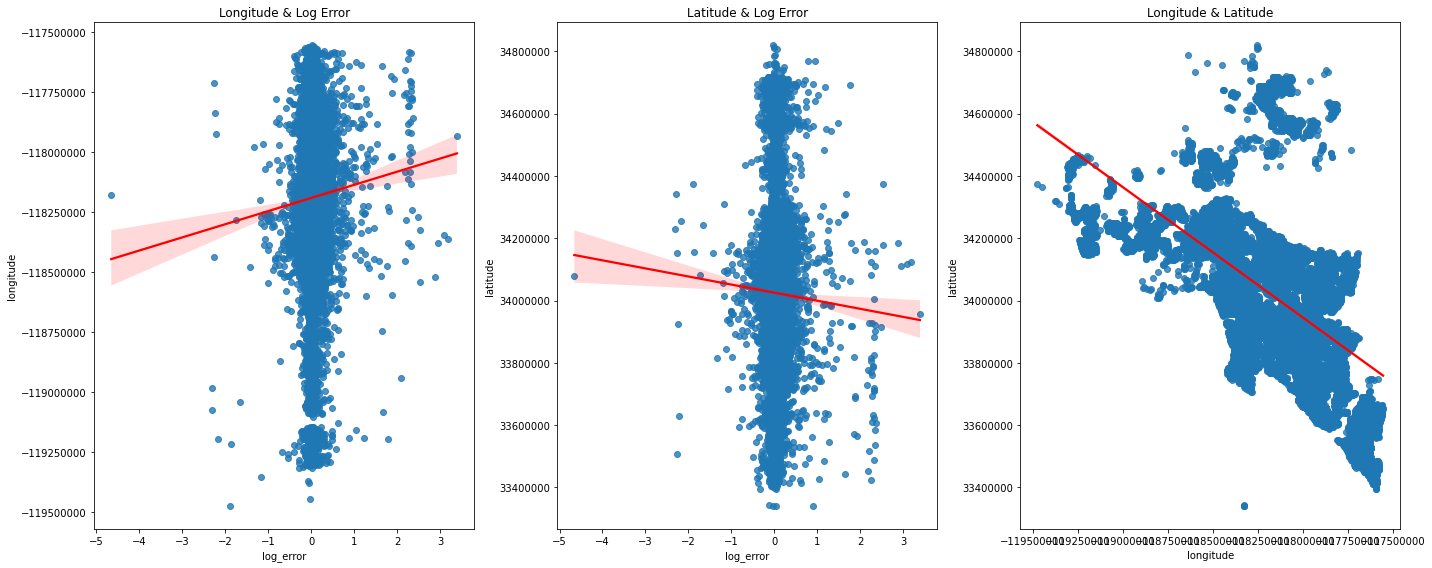

In [8]:
# Subplot of each variable for comparison
e.Q1_viz_1(train)

<div class="alert alert-info">

    
#### Q1 Initial Observation:    
* It appears that both Longitude and Latitude have a relationship with logerror and eachother as expected.

### longitude & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between longitude and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between longitude and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (longitude) vs Continuous (log_error) = **Pearson’s R**.

In [24]:
# Pearsons-R for longitude & logerror
e.pearson_r(train, 'longitude', 'log_error')

Reject the null hypothesis
_____________________
correlation 0.0263
p-value 0.0


### latitude & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between latitude and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between latitude and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (latitude) vs Continuous (log_error) = **Pearson’s R**.

In [25]:
### Pearsons-R for latitude & logerror
e.pearson_r(train, 'latitude', 'log_error')

Reject the null hypothesis
_____________________
correlation -0.0162
p-value 0.0067


### longitude & latitude

* $H_{0}$: There is **NOT a significant** ```relationship``` between longitude and latitude  
* $H_{a}$: There **is a significant** ```relationship``` between longitude and latitude  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (longitude) vs Continuous (latitude) = **Pearson’s R**.

In [26]:
# Pearsons-R for longitude & latitude
e.pearson_r(train, 'longitude', 'latitude')

Reject the null hypothesis
_____________________
correlation -0.5443
p-value 0.0


<div class="alert alert-info">

## Q1 Findings

### The p-value is less than the alpha. 
    
### YES
* There **is a significant** ```relationship``` between log_error and
    * longitude
    * latitude 

### YES
* There **is a significant** ```relationship``` between longitude and latitude  
      
### **There is evidence to support that both longitude and latitude have some impact on the log_error and eachother.**  
    
* Based on this statistical finding we believe that longitude and latitude will make good candidates for clustering. Adding an encoded version of the resulting cluster from these features will likely increase the models ability to predict logerror.

<div class="alert alert-warning">


# Question 2: 
# Is there a relationship between our loc_clusters feature, and each of the five independent clusters 0-4 as binary categorical features, with logerror?

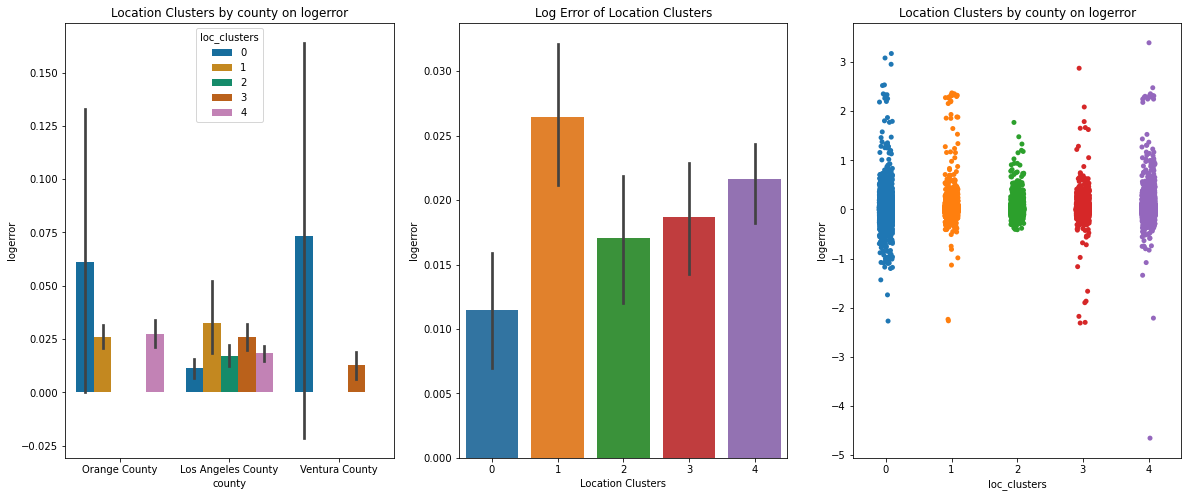

In [12]:
e.Q2_viz_1(train)

<div class="alert alert-info">

    
#### Q2 Initial Observation:    
    
* It appears in the first visualization (when separating by county), that location cluster 0 has an extremely high rate of logerror, but it also shows extremely low confidence. 
    
* The second visual shows that location cluster 1 has the highest rate of logerror while all location clusters share very similar overlapping confidence ratings.
    
* The third visual appears to favor clusters 0 & 1 as well but wev'e already seen how horrible the confidence of 0 was. 
    
### It is fairly clear from each of the visualizations that clusters 2, 3, and 4 are not driving as much error as clusters 0 and 1.  The independant binary categorical features of clusters 0 and 1 should be evaluated more closely.

### loc_clusters & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between loc_clusters and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between loc_clusters and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (loc_clusters) vs Continuous (log_error) = **Pearson’s R**.

In [20]:
# Pearson-R for loc_clusters against logerror
e.pearson_r(train, 'loc_clusters', 'log_error')

Reject the null hypothesis
_____________________
correlation 0.0158
p-value 0.0079


### Independent location clusters 0-4 & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between each loc_cluster (0-4) and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between each loc_cluster (0-4) and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Many_Sample
* Discreat (loc_cluster_0, 1, 2, 3, 4) vs Continuous (log_error) = **Kruskal**.

In [21]:
# Kruskal for each of the clusters as binary categoricals against logerror
e.Q2_kruskal_test_1(train)

Reject the null hypothesis
_____________________
t-stat 82.4687
p-value 0.0


### loc_clusters_0 & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between loc_clusters_0 and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between loc_clusters_0 and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (loc_clusters_0) vs Continuous (log_error) = **Pearson’s R**.

In [33]:
# Pearson-R for loc_clusters_0 against logerror
e.pearson_r(train, 'loc_clusters_0', 'log_error')

Reject the null hypothesis
_____________________
correlation -0.0257
p-value 0.0


### loc_clusters_1 & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between loc_clusters_1 and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between loc_clusters_1 and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (loc_clusters_1) vs Continuous (log_error) = **Pearson’s R**.

In [23]:
# Pearson-R for loc_clusters_1 against logerror
e.pearson_r(train, 'loc_clusters_1', 'log_error')

Reject the null hypothesis
_____________________
correlation 0.0194
p-value 0.0011


### loc_clusters_2, 3, 4 & logerror

* $H_{0}$: There is **NOT a significant** ```relationship``` between loc_clusters_2, 3, 4 and log_error  
* $H_{a}$: There **is a significant** ```relationship``` between loc_clusters_2, 3, 4 and log_error  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (loc_clusters_2, 3, 4) vs Continuous (log_error) = **Pearson’s R**.

In [34]:
# Pearson-R for loc_clusters_1 against logerror
e.pearson_r(train, 'loc_clusters_2', 'log_error')

Fail to reject the null hypothesis
_____________________
correlation -0.0034
p-value 0.5734


In [35]:
# Pearson-R for loc_clusters_1 against logerror
e.pearson_r(train, 'loc_clusters_3', 'log_error')

Fail to reject the null hypothesis
_____________________
correlation -0.0005
p-value 0.9355


In [36]:
# Pearson-R for loc_clusters_1 against logerror
e.pearson_r(train, 'loc_clusters_4', 'log_error')

Fail to reject the null hypothesis
_____________________
correlation 0.0113
p-value 0.0588


<div class="alert alert-info">

## Q2 Findings

### The statistical tests confirm our initial observations.    
    
  
### YES
* There is a significant ```relationship``` between log_error and 
    * loc_clusters
    * loc_clusters 0-4
    * Independant loc_clusters_0
    * Independant loc_clusters_1  
    

### NO
* There is **NOT** a significant ```relationship``` between logerror and
    * Independant loc_clusters_2 
    * Independant loc_clusters_3 
    * Independant loc_clusters_4 
    
    
**There is evidence to support that homes in location cluster 0 and 1 are driving higher rates of logerror on Zestimate and may be able to assist in improving the original Zestimate model.**  
    
* Based on these statistical findings we believe that the binary categorical features of subcluster 0 and 1 are driving factors in logerror. Adding encoded versions of these features to the model will likely increase the models ability to predict logerror.

<div class="alert alert-warning">

# Question 3: 
# Is there a relationship between log_error and tax delinquency?

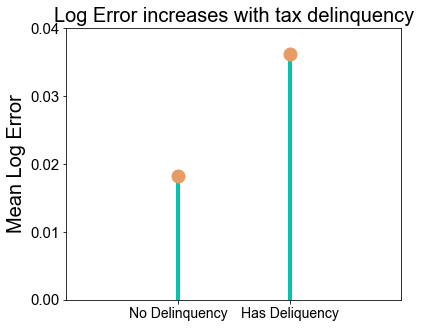

In [37]:
# get loliplot graph for delinquency vs logerror
e.get_loliplot_delinquency(train)

<div class="alert alert-info">

    
#### Q3 Initial Observation:    
    
* Properties that have been delinquent in their porperty taxes seem to have more log error in their Zestimates

### logerror of tax delinquencies 

* $H_0$: Mean Log error in properties with tax delinquency <= Mean Log error in properties with no tax delinquency

* $H_a$: Mean Log error in properties with tax delinquency > Mean Log error in properties with no tax delinquency


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


We will now conduct a two-tail T-test to determine if there is significant difference between the mean log error of properties with tax delinquency  is greater than the log error of properties with no tax deliquency.

In [38]:
# obtain ttest 
e.get_ttest_delinquency(train)

Reject the null hypothesis
_____________________
t-stat -2.5847
p-value 0.00495


<div class="alert alert-info">


## Q3 Findings:

### YES
* The mean Log error in properties with tax delinquency > the Mean Log error in properties with no tax delinquency
* Since p-value/2 is less than the alpha we reject the null hypothesis.
    
### There is evidence to support that properties that have tax delinquency on average have a higher log error. Based on this statistical finding we believe that has_delinquency is a driver of log error and  adding this feature will likely improve our model.

<div class="alert alert-warning">


# Question 4: 
# Do homes that are younger than 81 years have more log error?

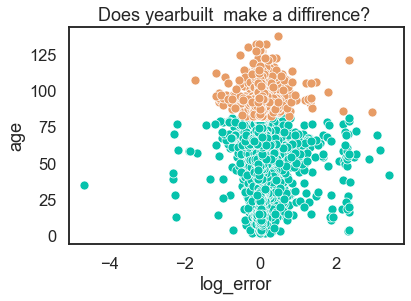

In [39]:
# obtain scatter plot home age vs logerror 
e.get_scatterplot_age(train)

<div class="alert alert-info">

    
#### Q4 Initial Observation:   

* There seems to be more spread in the log error of homes that are younger than 81 years.

### House age younger than 81 > House age older than 81 

* $H_0$: Mean Log error in properties 81 years old and younger <= Mean Log error in properties older than 81 years

* $H_a$: Mean Log error in properties 81 years old and younger > Mean Log error in properties older than 81 years


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


We will now conduct a two-tail T-test to determine if there is significant difference between the mean log error of homes 81 years or younger  is greater than the log error of properties .

In [40]:
# obtain ttest for home age
e.get_ttest_age(train)

Reject the null hypothesis
_____________________
t-stat -2.3995
p-value 0.00825


<div class="alert alert-info">


## Q4 Findings:

### YES
* The mean Log error in properties 81 years old or younger > the Mean Log error in properties older than 81 years old
* Since p-value/2 is less than the alpha we reject the null hypothesis.

### There is evidence to support that properties 81 years old younger have a higher log error than properties older than 81 years. Based on this statistical finding we believe that age is a driver of log error and adding this feature will likely improve our model.

<div class="alert alert-warning">


# Question 5: 
# Do the clusters have a relationship with logerror and squarefeet of the home?

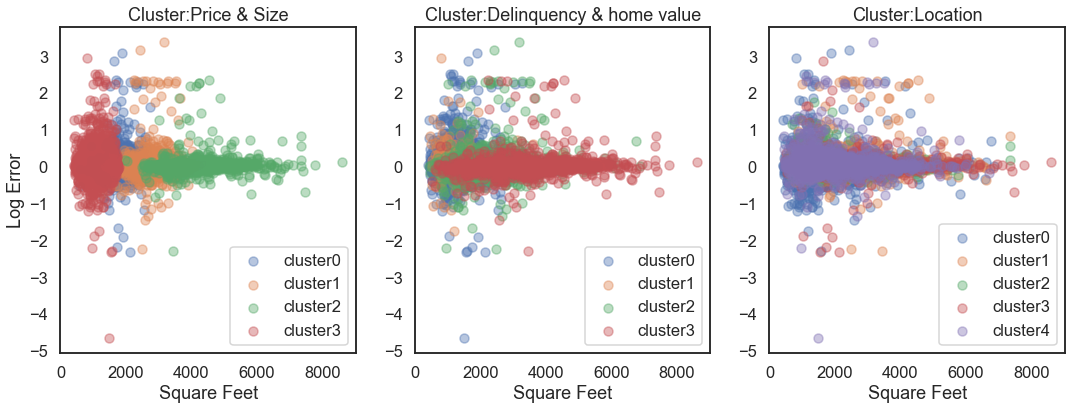

In [41]:
# obtain cluster visuals
e.group_clusters(train)

<div class="alert alert-info">

    
#### Q5 Initial Observation:   

* Under Cluster:Price & Size there is a grouping with the most log error spread under cluster 0 and cluster 1

### logerror & Cluster Price & Size - sub cluster 0

* $H_0$: There is **no linear correlation** between log_error and Cluster:Price & Size -sub cluster 0 .

* $H_a$: There **is a linear relationship** between log_error value and Cluster:Price & Size -sub cluster 0.


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


We will now conduct pearsonr test to for a linear relationship between the Cluster:Price & Size -sub cluster 0 and log error.
We will also conduct pearsonr test for a linear relationship between the sub Cluster:Price & Size -sub cluster 1 and log error


In [42]:
# pearsonr test for log error vs Cluster:Price & Size -sub cluster 0 
e.pearson_r(train, 'log_error', 'cluster_price_size_0' )

Reject the null hypothesis
_____________________
correlation -0.0182
p-value 0.0023


In [43]:
# pearsonr test for log error vs Cluster:Price & Size -sub cluster 1
e.pearson_r(train, 'log_error', 'cluster_price_size_1' )

Reject the null hypothesis
_____________________
correlation 0.0155
p-value 0.0091


<div class="alert alert-info">


## Q5 Findings:

### YES
* The mean Log error in properties 81 years old or younger > the Mean Log error in properties older than 81 years old
* Since The p-value for both subclusters are less than alpha we reject the null hypothesis.


### There is evidence to support that there is a relationship these two sub clusters. We believe that adding them into the model will help improve the models ability to predict.

# Exploration Summary
<div class="alert alert-info">

## Generally speaking the majority of the features in our DataFrame have a linear Relationship with our taeget but the Features with the most significant relationship were:

  1. Property Squarefeet ```('calculatedfinishedsquarefeet')```
  2. Bathrooms ```('bathroomcny')```
  3. Bedrooms ```('bedroomcnt')```     
    
* We found that Property SQFT has the highest correlation with Tax Assessed Property Value at 48%
* The number of Bathrooms comes in at a close second at 44%
* However, the number of Bedrooms (still the third highest correlation) only scores a 24%

## Takeaways:
* Features available are sufficient to conduct predictions
* We could benefit greatly from additional data and Feature Engineering of Location Data
    ```

## Features that will be selected for Modeling:

The following features were selected since they seem to have a relationship of influence on log error:
* has_taxdelinquencty 
* cluster_prize_size_0 
* cluster_price_size_1 
* cluster_delinquency_value_1
* age (scaled)
* latitude
* longitude


In [ ]:
train.loc_clusters

In [ ]:
features_to_model1 =['has_taxdelinquency', 'cluster_price_size_0', 'cluster_price_size_1', 'age','log_error']

In [ ]:
features_to_model2= ['longitude','latitude','age','loc_clusters','loc_clusters_1','loc_clusters_0','log_error']

## Features that will be not included in modeling:

The rest of the  features will be dropped from this itteration of modeling due to time constriction.

# !!! needs to be updated Modeling:

* Since the  Home Value is not normaly distributed I will use **median as a baseline** set at $340,572.

* $R^2$ is the primary metric I will use to evaluate models and secondary will be a favorable $RMSE$. 
* $R^2$ helps understand how well the model fits the data.

* I will evaluate the following top models on train and validate:
        * Polynomial Regression degree 2
        * Polynomial Regression degree 2 with interactions only
        * Polynomial Regression degree 3
        * Polynomial Regression degree 4
* The model that performs the best on validate data will be run with test data.

In [ ]:
# prepare data for modeling features set 1
X_train_scaled,y_train, X_validate_scaled,y_validate, X_test_scaled, y_test = m.model_data_prep(train_scaled, validate_scaled,test_scaled, features_to_model1)

In [ ]:
# prepare data for modeling features set 2
X_train_scaled2,y_train2, X_validate_scaled2,y_validate2, X_test_scaled2, y_test2 = m.model_data_prep2(train_scaled, validate_scaled,test_scaled, features_to_model2)

In [ ]:
# features set 1 on train and validate
metric1= m.modeling(X_train_scaled, y_train, X_validate_scaled,y_validate, X_test_scaled, y_test)


In [ ]:
# features set 2 on train and validate
metric2 = m.modeling2(X_train_scaled2, y_train2, X_validate_scaled2,y_validate2, X_test_scaled2, y_test2)


In [ ]:
metric1,

In [ ]:
metric2

In [ ]:
metric=pd.concat([metric1,metric2],ignore_index=True)
metric

# TEST F2:OLS REGRESSOR........

# Comparing Top Models on train and Validate 

### * Baseline Median Home Value                                                            $340,572

All models outperformed median baseline in terms of RMSE in both train and validate data.

Polynomial Regressor degree 4 did best in train data in both RMSE and $R^2$

The model with the best $R^2$ and RMSE in validate data is Polynomial Regressor degree 3.

**I will select model Polynomial Regressor degree 3 since it has the highest R2 and a least RMSE to other models on validate**

# Model on Test data

In [ ]:
# get metrics on Final Model
m.metric_test(test_pred[['poly_d3','baseline_median']],y_test)

## Modeling Summary

* All models performed better than the baseline
* The Final Model Polynomial Regressor degree 3 had an $R^2$ or .37 on test data and had a better RMSE than baseline by $73,639.

In [ ]:
e.distribution_top_model(y_test, test_pred)   


# Conclusion

## Exploration



* Homes with an optional feature such as deck, pools, garage, fireplace have more value.
* Home with more bedrooms and bathrooms tend to have more value on average.
* County location make a difference in home value.
* Home age has a relationship with home value.

## Modeling

**The final model has an $R^2$ of 0.37 and performed  better than the median baseline by $ 73,639 RMSE** 


## Recommendations

* Standardize methods of data collection to increase data accuracy; this will likely improve models ability to predict future home values.

## Next Steps

* Look into locations of homes with information about neighborhoods and/or longitute and latitute to explore relationships between location and home value.
* Explore if lot size has and influence on home value.
